<a href="https://colab.research.google.com/github/Rafka-IP/Percobaan-Responsive-Web/blob/main/Dicoding_Machine_Learning_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Citra Gambar 'Kertas Gunting Batu' dengan Tensorflow Keras

Hai, perkenalkan saya Rafka Imanda Putra, saya memiliki passion terhadap data science, dan saat ini saya masih duduk di bangku kelas 10 SMKN 4 Bandung jurusan Rekayasa Perangkat Lunak. 
 
Berikut ini adalah submission saya untuk lulus dengan baik di kelas Machine Learning untuk Pemula. Dalam pembuatannya, saya sangat terbantu dari berbagai referensi yang saya cantumkan dibagian paling bawah.

Nama: Rafka Imanda Putra
 
Surel: rafka.0312@gmail.com

## Persiapan Library

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
 
import zipfile, os
from google.colab import files
 
%matplotlib inline

## Menyiapkan Dataset dan Direktori

In [105]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-02 03:36:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  1.81MB/s    in 4m 31s  

2021-05-02 03:41:05 (1.14 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [106]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()
 
dir_gunting = os.path.join('/content/rockpaperscissors/scissors')
dir_batu = os.path.join('/content/rockpaperscissors/rock')
dir_kertas = os.path.join('/content/rockpaperscissors/paper')

## Menerapkan Image Data Generator dan Men-split data validasi

In [107]:
base_dir = '/content/rockpaperscissors/rps-cv-images/'
 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.4,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.3,
    fill_mode = 'nearest'
)

In [108]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
    )
 
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Membuat Arsitektur CNN

In [109]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
 
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [110]:
model.compile(
    loss = CategoricalCrossentropy(), 
    optimizer = Adam(),
    metrics = ['accuracy']
)

## Menetapkan Callback

In [111]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print('Lapor! Akurasi sudah melebihi 96%')
      self.model.stop_training = True

## Melatih Model

In [112]:
history = model.fit(
    train_generator,
    steps_per_epoch = 4,
    epochs = 200,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2,
    callbacks = [myCallback()]
)

Epoch 1/200
4/4 - 10s - loss: 1.1150 - accuracy: 0.2891 - val_loss: 1.0959 - val_accuracy: 0.3125
Epoch 2/200
4/4 - 8s - loss: 1.0952 - accuracy: 0.3594 - val_loss: 1.0852 - val_accuracy: 0.5000
Epoch 3/200
4/4 - 8s - loss: 1.0932 - accuracy: 0.4062 - val_loss: 1.0810 - val_accuracy: 0.4375
Epoch 4/200
4/4 - 7s - loss: 1.0909 - accuracy: 0.3776 - val_loss: 1.0585 - val_accuracy: 0.4453
Epoch 5/200
4/4 - 8s - loss: 1.0676 - accuracy: 0.4219 - val_loss: 1.0538 - val_accuracy: 0.4453
Epoch 6/200
4/4 - 9s - loss: 1.0508 - accuracy: 0.4062 - val_loss: 1.0687 - val_accuracy: 0.4062
Epoch 7/200
4/4 - 9s - loss: 1.0645 - accuracy: 0.3828 - val_loss: 1.0378 - val_accuracy: 0.4609
Epoch 8/200
4/4 - 8s - loss: 1.0118 - accuracy: 0.5312 - val_loss: 0.9863 - val_accuracy: 0.5469
Epoch 9/200
4/4 - 8s - loss: 1.0149 - accuracy: 0.5078 - val_loss: 1.0953 - val_accuracy: 0.4531
Epoch 10/200
4/4 - 8s - loss: 1.0307 - accuracy: 0.4766 - val_loss: 1.0019 - val_accuracy: 0.5312
Epoch 11/200
4/4 - 8s - loss

## Membuat DataFrame Hasil Modelling

In [183]:
df = pd.DataFrame({'accuracy' : history.history['accuracy'],
                   'loss_accuracy': history.history['loss'],
                   'val_accuracy' : history.history['val_accuracy'],
                   'val_loss' : history.history['val_loss']
                   })
 
df.head()

,accuracy,loss_accuracy,val_accuracy,val_loss
0,0.289062,1.114964,0.312500,1.095852
1,0.359375,1.095198,0.500000,1.085192
2,0.406250,1.093236,0.437500,1.081019
3,0.377551,1.090892,0.445312,1.058505
4,0.421875,1.067558,0.445312,1.053801


In [184]:
df.describe()

,accuracy,loss_accuracy,val_accuracy,val_loss
count,76.000000,76.000000,76.000000,76.000000
mean,0.779309,0.510258,0.779091,0.510092
std,0.166351,0.279464,0.154635,0.272619
min,0.289062,0.117845,0.312500,0.170447
25%,0.755859,0.301473,0.726562,0.296497
50%,0.816406,0.445713,0.820312,0.447552
75%,0.890625,0.618324,0.892578,0.617790
max,0.959184,1.114964,0.968750,1.095852


## Plotting Accuracy dan Val_accuracy

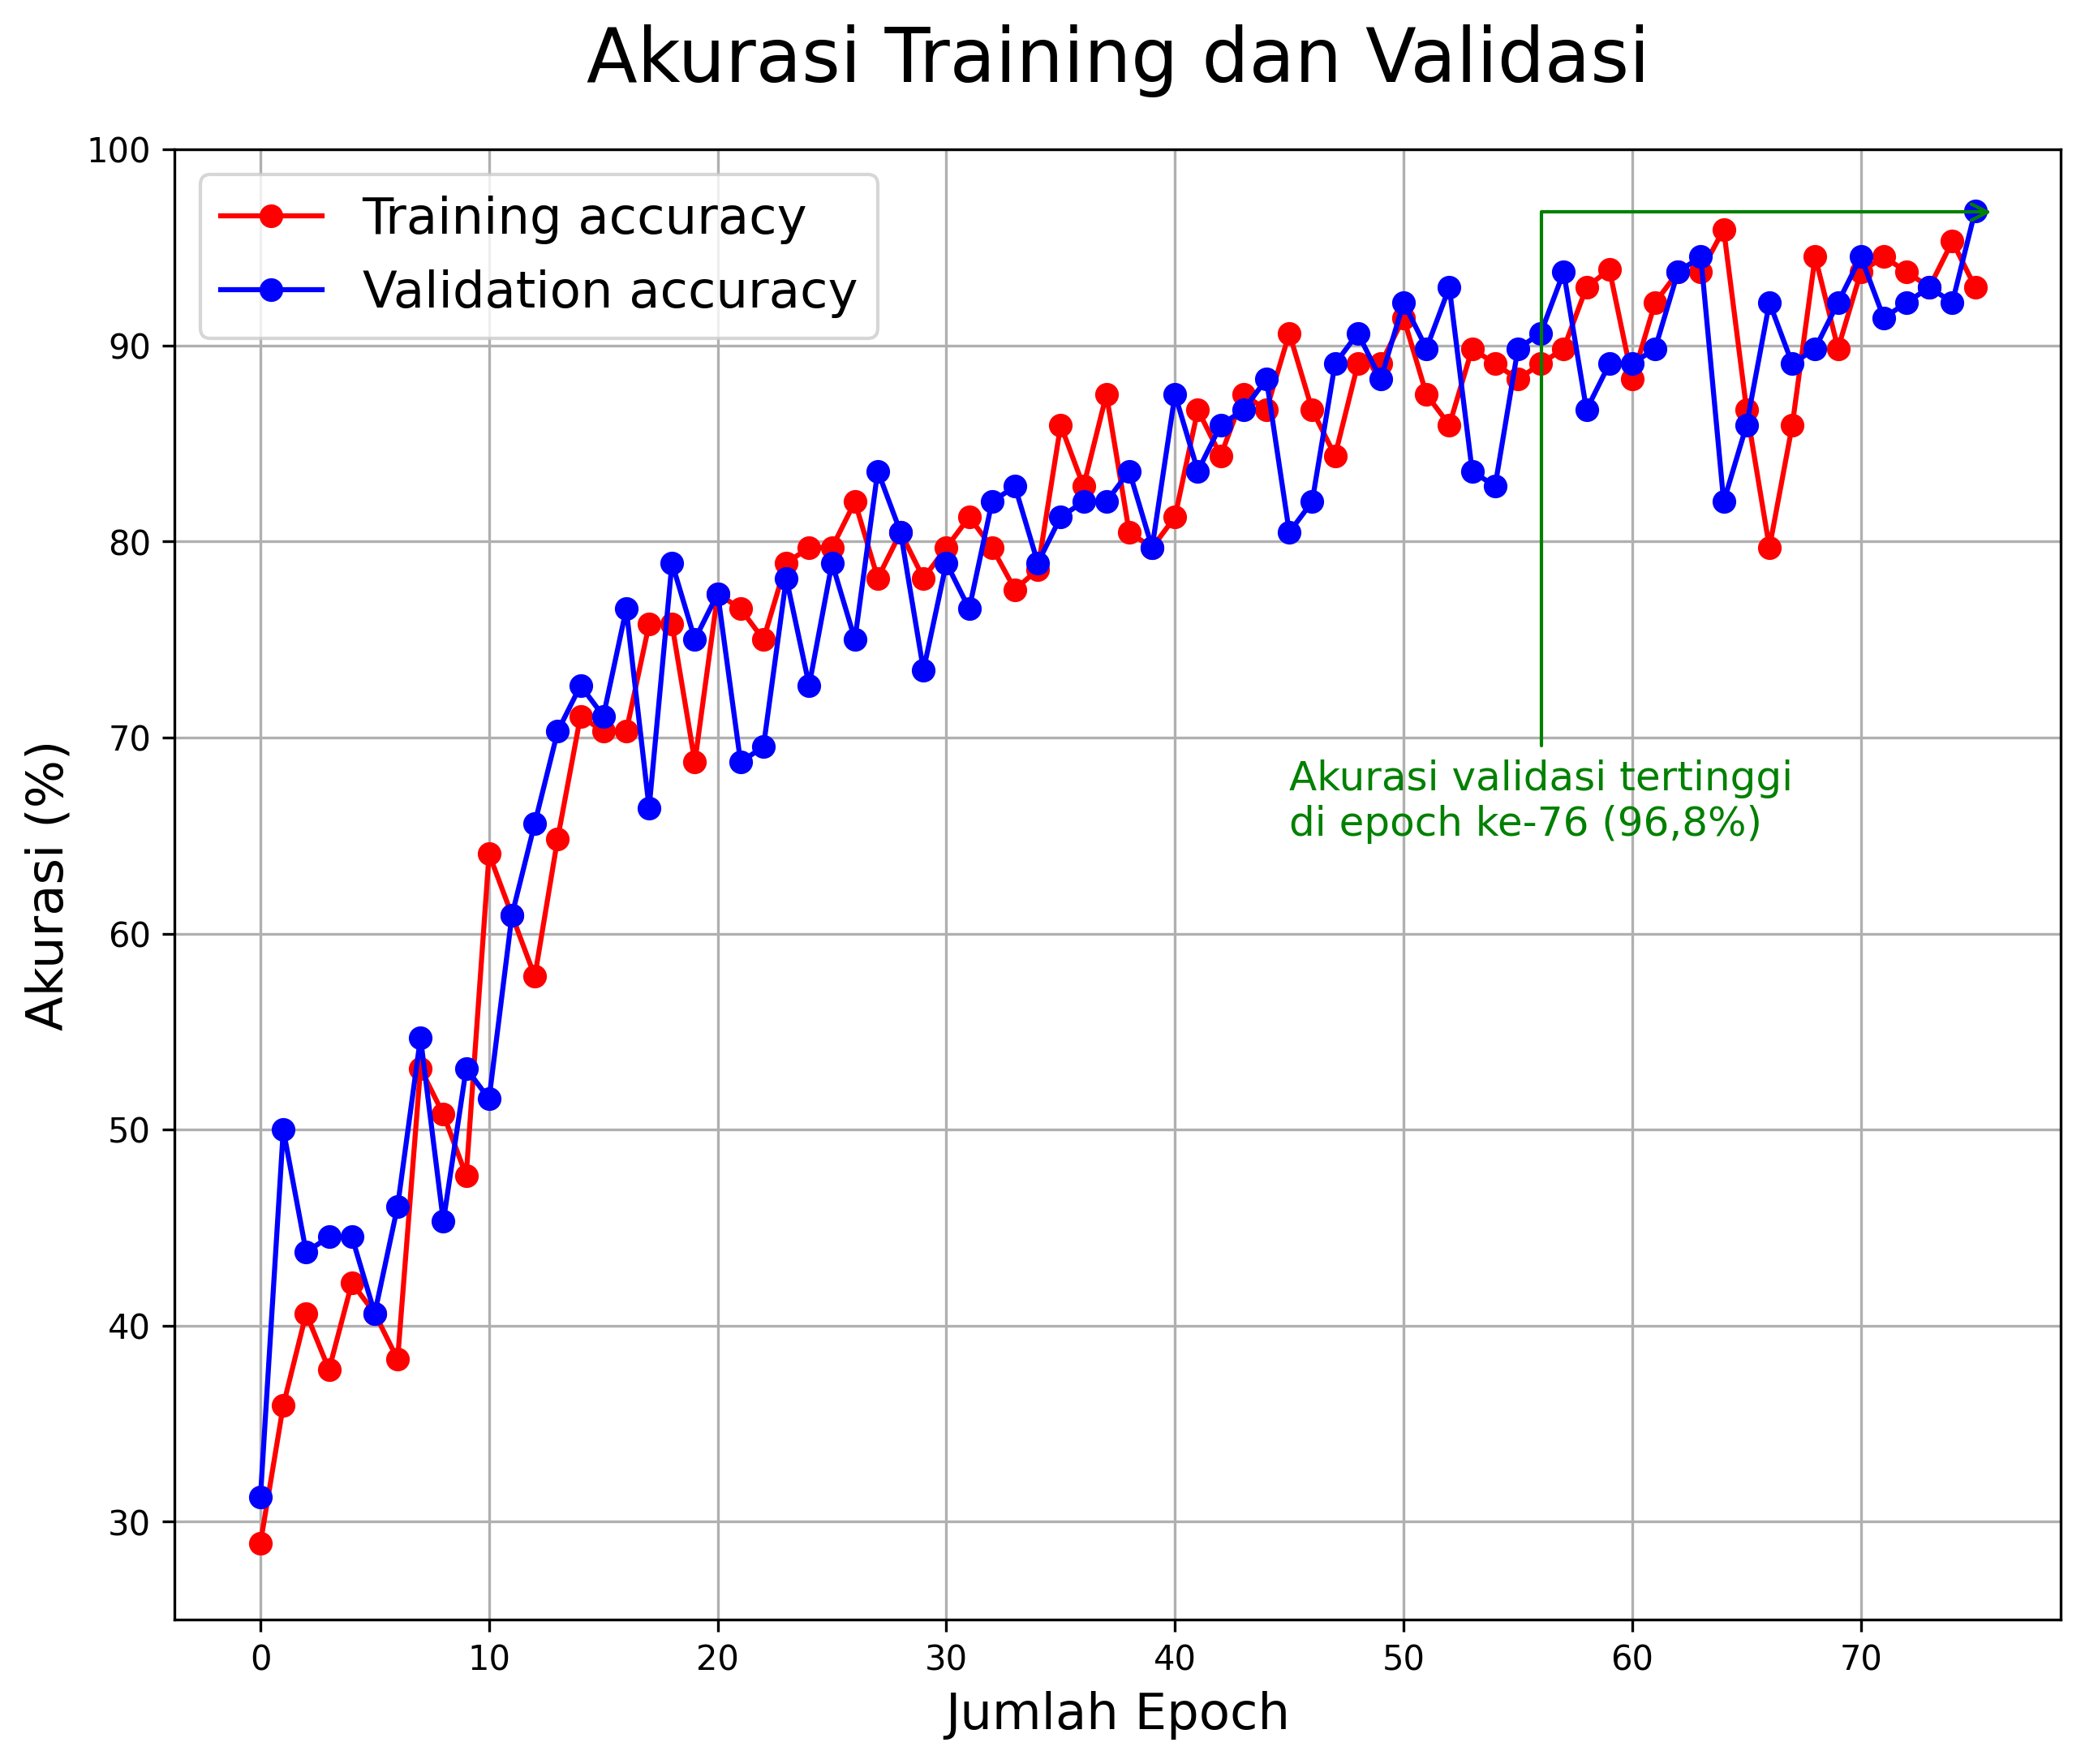

In [185]:
acc = df['accuracy']
loss = df['loss_accuracy']
val_acc = df['val_accuracy']
val_loss = df['val_loss']
 
fig, ax = plt.subplots(figsize=(10,8),dpi=300)
ax.plot(range(df.shape[0]), acc, color='r', marker='o', label='Training accuracy')
ax.plot( val_acc, color='b', marker='o',  label='Validation accuracy')
 
ax.set_title('Akurasi Training dan Validasi', fontsize=22, pad=20)
ax.set_xlabel('Jumlah Epoch', fontsize=15)
ax.set_ylabel('Akurasi (%)', fontsize=15)
 
plt.annotate('Akurasi validasi tertinggi\ndi epoch ke-76 (96,8%)',
                xy=(76,0.968), xytext=(45, 0.65), fontsize=12, color='green',
                arrowprops=dict(arrowstyle='->', connectionstyle='angle', color='green'))
ax.grid(True)
ax.legend(loc='best', fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels*100).astype(int))
plt.ylim(ymin=0.25, ymax=1)
 
plt.show()

## Memprediksi Gambar Baru

In [127]:
file = files.upload()

Saving 16199278212257656727654381149078.jpg to 16199278212257656727654381149078.jpg


16199278212257656727654381149078.jpg
[[1. 0. 0.]]

Hasil prediksi: Kertas


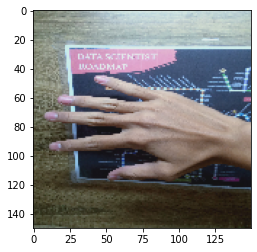

In [128]:
for i in file.keys():
  path = i
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
 
  print(i)
  print(classes)
  print('\n===========================================')
  if classes[0][0] == 1:
    print('Hasil prediksi: Kertas')
  elif classes[0][1] == 1:
    print('Hasil prediksi: Batu')
  elif classes[0][2] == 1:
    print('Hasil prediksi: Gunting')
  else:
    print('Gambar salah')

## Referensi